In [25]:
# importing libraries

import pandas as pd

import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [5]:
#Q1

data = pd.read_csv('titanic.csv')

data.info()

missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2

In [12]:
df_dropped_columns = data.drop(columns=['Cabin'])


data['Age'] = data['Age'].fillna(data['Age'].mean())

missing_values = data.isnull().sum()

In [14]:
#Q 2 ------------------------------


data = pd.read_csv('Car_Evaluation.csv')

data.info()

missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1728 non-null   int64 
 1   buying      1728 non-null   object
 2   maint       1728 non-null   object
 3   doors       1728 non-null   object
 4   persons     1728 non-null   object
 5   lug_boot    1728 non-null   object
 6   safety      1728 non-null   object
 7   Target      1728 non-null   object
dtypes: int64(1), object(7)
memory usage: 108.1+ KB
Missing Values:
 Unnamed: 0    0
buying        0
maint         0
doors         0
persons       0
lug_boot      0
safety        0
Target        0
dtype: int64


In [16]:
# One-Hot Encoding
df_one_hot = pd.get_dummies(data, columns=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'Target'])

print("One-Hot Encoded DataFrame:\n", df_one_hot)


One-Hot Encoded DataFrame:
       Unnamed: 0  buying_high  buying_low  buying_med  buying_vhigh  \
0              0        False       False       False          True   
1              1        False       False       False          True   
2              2        False       False       False          True   
3              3        False       False       False          True   
4              4        False       False       False          True   
...          ...          ...         ...         ...           ...   
1723        1723        False        True       False         False   
1724        1724        False        True       False         False   
1725        1725        False        True       False         False   
1726        1726        False        True       False         False   
1727        1727        False        True       False         False   

      maint_high  maint_low  maint_med  maint_vhigh  doors_2  ...  \
0          False      False      False         Tru

In [21]:
# Label Encoding
df_label_encoded = data.copy()
label_encoder = LabelEncoder()
for column in ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'Target']:
    df_label_encoded[column] = label_encoder.fit_transform(df_label_encoded[column])
print("\nLabel Encoded DataFrame:\n", df_label_encoded)


Label Encoded DataFrame:
       Unnamed: 0  buying  maint  doors  persons  lug_boot  safety  Target
0              0       3      3      0        0         2       1       2
1              1       3      3      0        0         2       2       2
2              2       3      3      0        0         2       0       2
3              3       3      3      0        0         1       1       2
4              4       3      3      0        0         1       2       2
...          ...     ...    ...    ...      ...       ...     ...     ...
1723        1723       1      1      3        2         1       2       1
1724        1724       1      1      3        2         1       0       3
1725        1725       1      1      3        2         0       1       2
1726        1726       1      1      3        2         0       2       1
1727        1727       1      1      3        2         0       0       3

[1728 rows x 8 columns]


In [30]:
#Q 3-------------




data = pd.read_csv('winequality-white.csv', delimiter=';')

data.info()


print(data.head())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36 

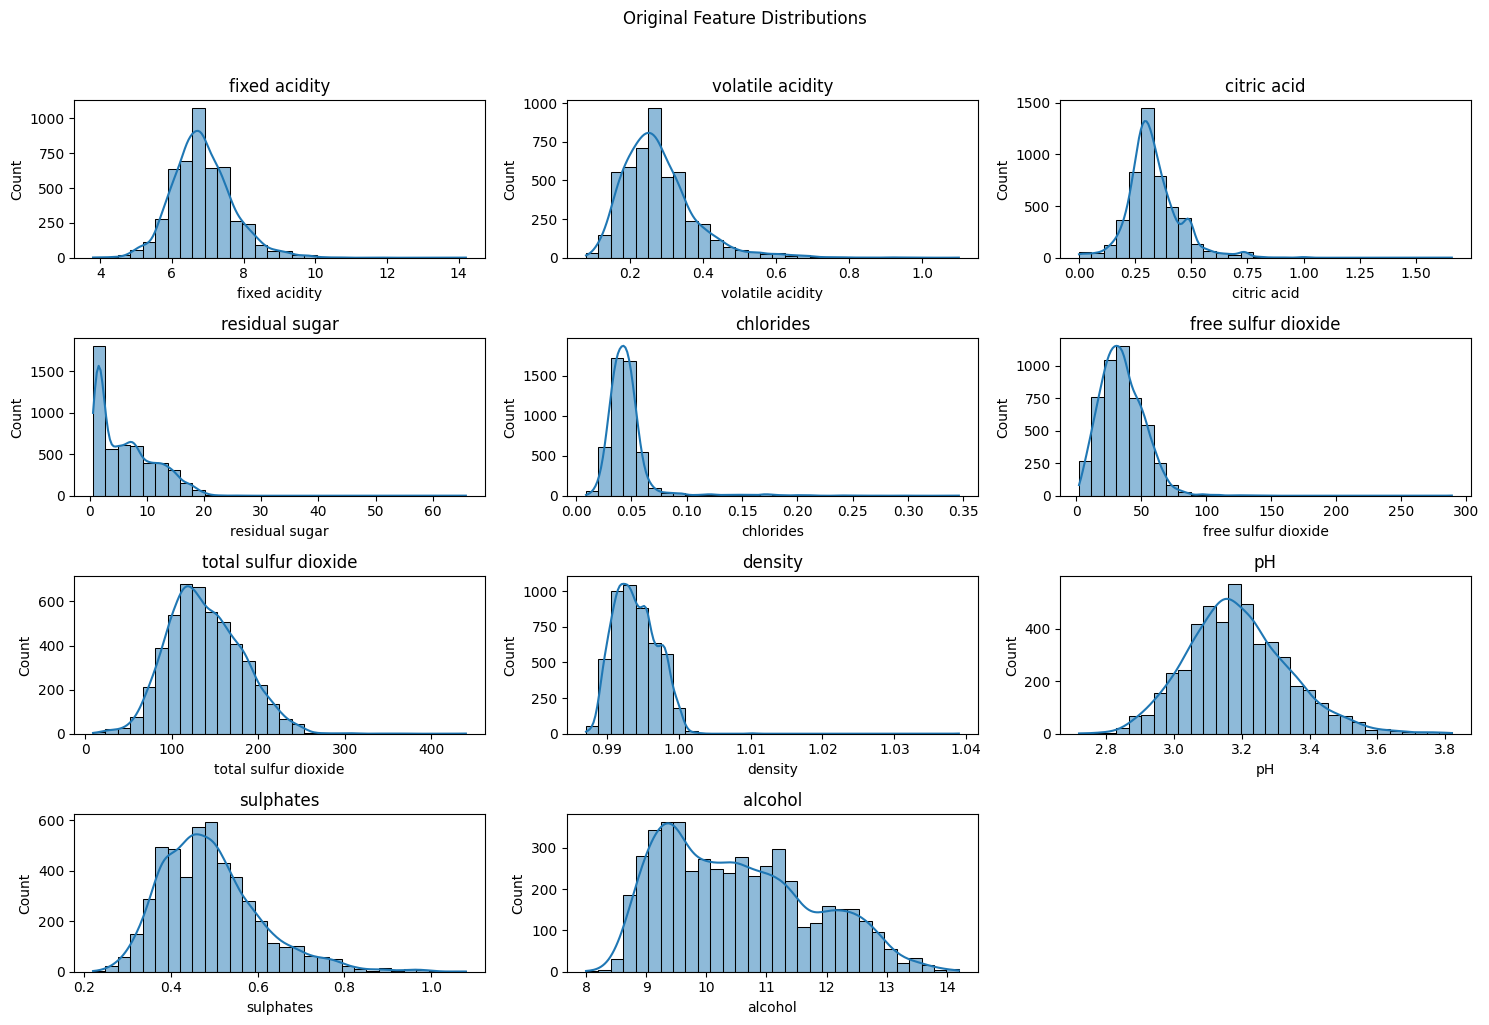

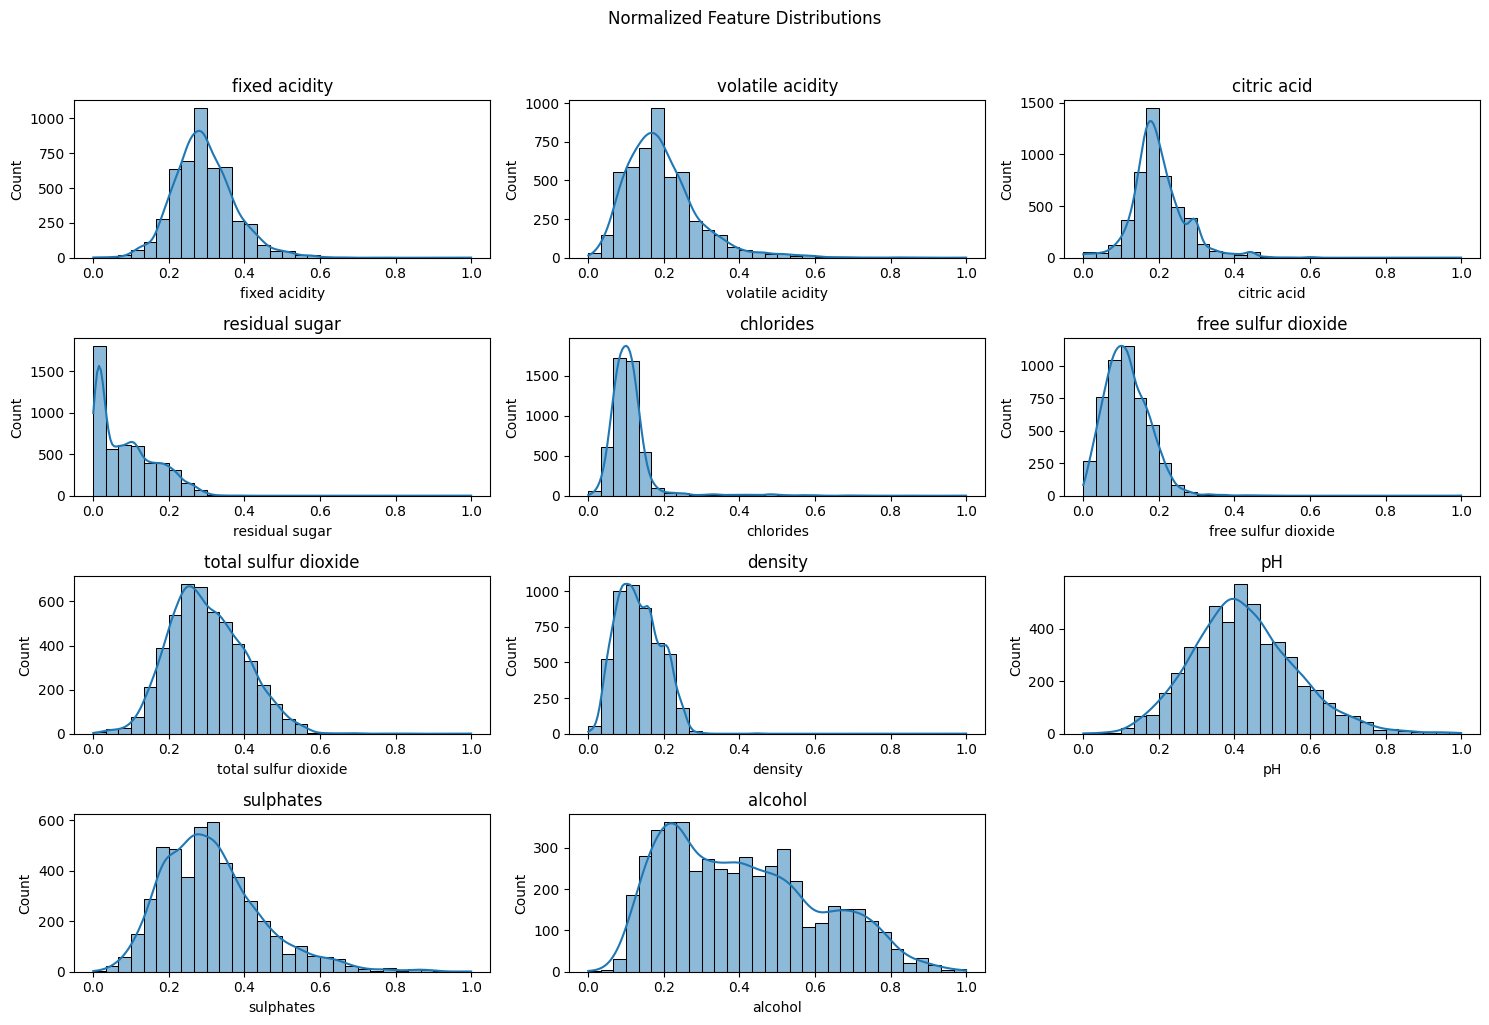

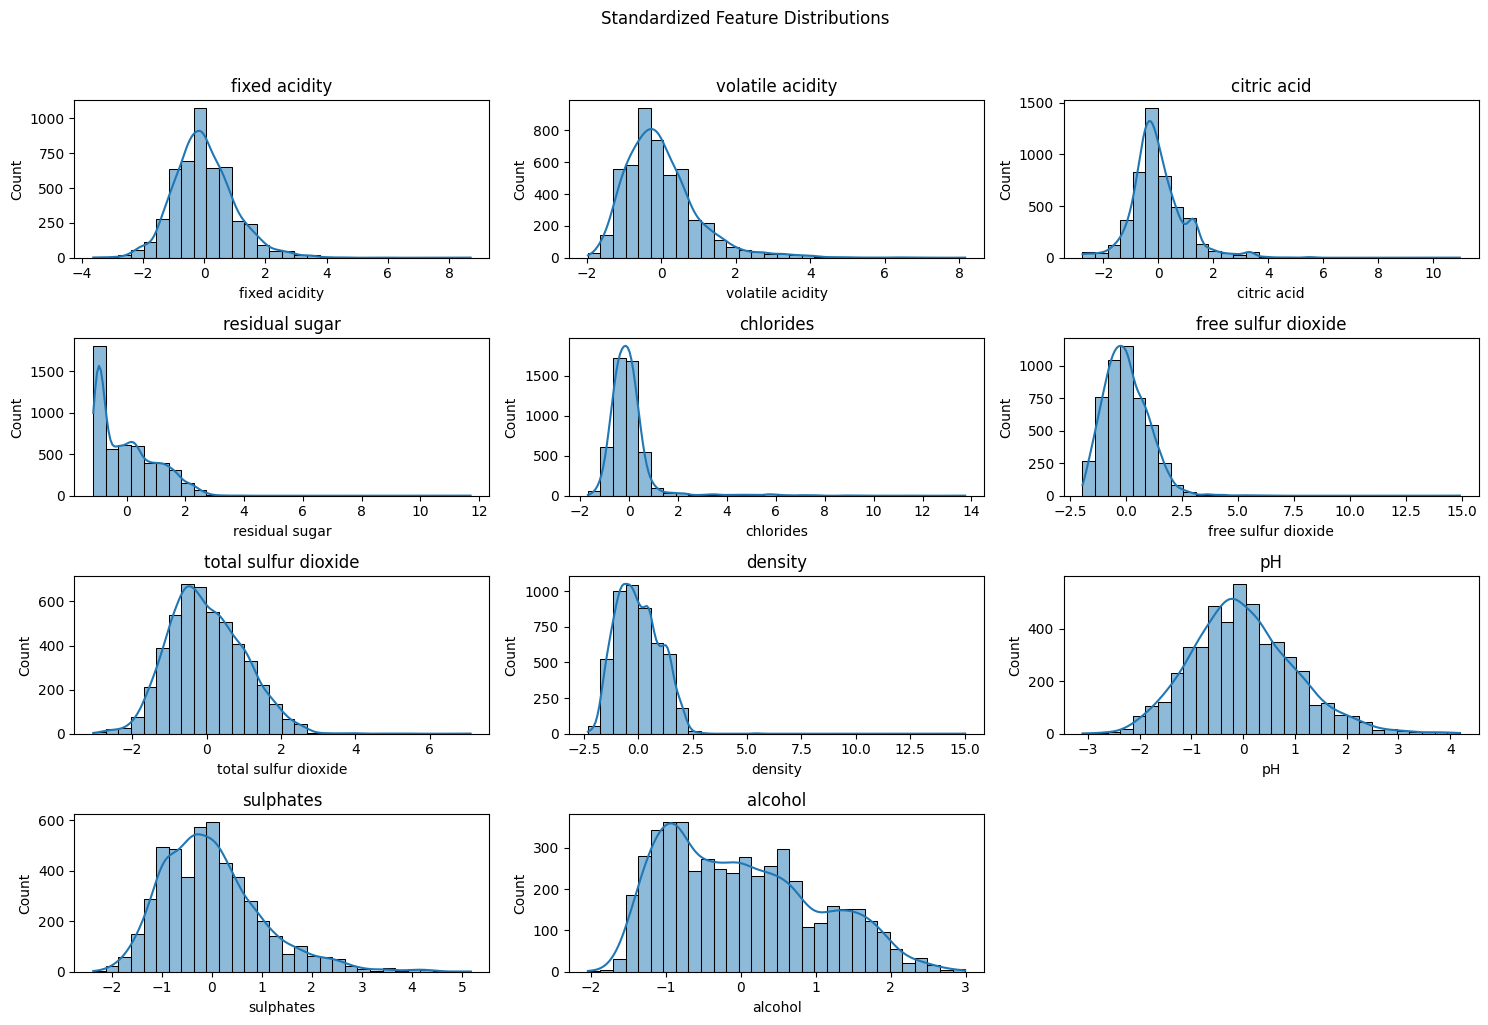

In [32]:
# Features and target
features = data.drop(columns=['quality'])
target = data['quality']

# Normalization
scaler_minmax = MinMaxScaler()
features_normalized = scaler_minmax.fit_transform(features)

# Standardization
scaler_standard = StandardScaler()
features_standardized = scaler_standard.fit_transform(features)


# Function to plot histograms for each feature
def plot_histograms(features, title):
    plt.figure(figsize=(15, 10))
    for i, column in enumerate(features.columns, 1):
        plt.subplot(4, 3, i)
        sns.histplot(features[column], bins=30, kde=True)
        plt.title(column)
    plt.suptitle(title, y=1.02)
    plt.tight_layout()
    plt.show()

# Original Data
plot_histograms(features, "Original Feature Distributions")

# Normalized Data
features_normalized_df = pd.DataFrame(features_normalized, columns=features.columns)
plot_histograms(features_normalized_df, "Normalized Feature Distributions")

# Standardized Data
features_standardized_df = pd.DataFrame(features_standardized, columns=features.columns)
plot_histograms(features_standardized_df, "Standardized Feature Distributions")


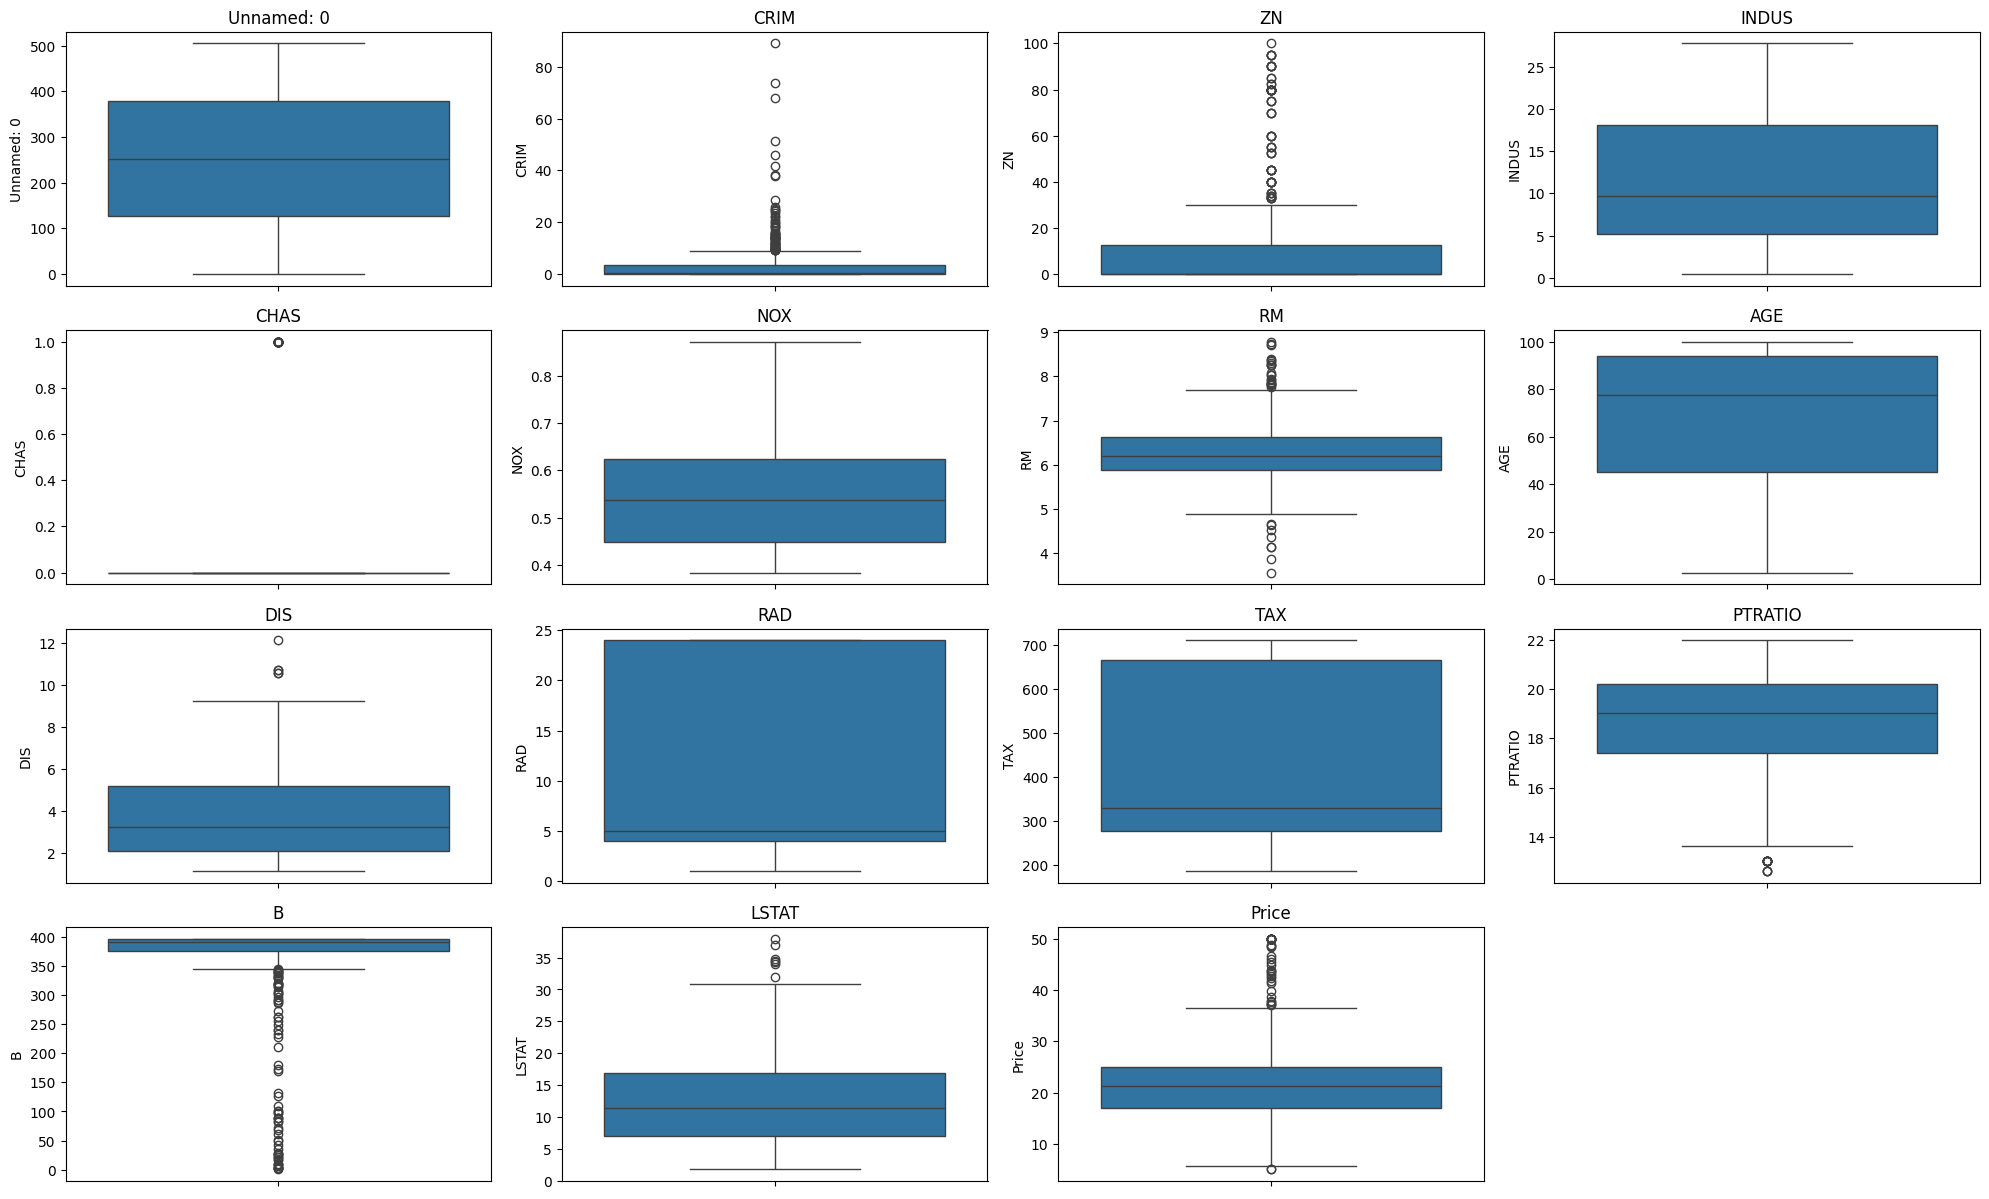

In [37]:
#Q 4 --------------------


data = pd.read_csv('boston.csv')


# Function to plot boxplots for each feature
def plot_boxplots(data):
    plt.figure(figsize=(20, 15))
    for i, column in enumerate(data.columns, 1):
        plt.subplot(5, 4, i)
        sns.boxplot(data=data[column])
        plt.title(column)
    plt.tight_layout()
    plt.show()

plot_boxplots(data)



In [59]:
# Function to identify outliers using IQR
def identify_outliers_iqr(data):
    outliers = pd.DataFrame()
    for column in data.columns:
        if data[column].dtype in ['float64', 'int64']:
            Q1 = data[column].quantile(0.25)
            Q3 = data[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers[column] = ((data[column] < lower_bound) | (data[column] > upper_bound))
    return outliers

# Identify outliers
outliers_iqr = identify_outliers_iqr(data)

# Count outliers in each column
outliers_iqr_sum = outliers_iqr.sum()

print(outliers_iqr_sum)




Unnamed: 0     0
CRIM          66
ZN            68
INDUS          0
CHAS          35
NOX            0
RM            30
AGE            0
DIS            5
RAD            0
TAX            0
PTRATIO       15
B             77
LSTAT          7
Price         40
dtype: int64


In [63]:
# Function to remove outliers
def remove_outliers(data, outliers):
    df_cleaned = data[~outliers.any(axis=1)]
    return df_cleaned

# Remove outliers
df_cleaned = remove_outliers(data, outliers_iqr)

# Display the shape of the original and cleaned datasets
print("Original dataset shape:", data.shape)
print("Cleaned dataset shape:", df_cleaned.shape)




Original dataset shape: (506, 15)
Cleaned dataset shape: (268, 15)


In [68]:
#Q  5
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

data = pd.read_csv('retail_sales_dataset.csv')

# Display the first few rows to verify loading
print("Original Data:\n", data.head())


# Initialize the KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)

# Select columns with numeric data types for imputation
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Perform KNN imputation
data_knn_imputed = data.copy()
data_knn_imputed[numeric_cols] = knn_imputer.fit_transform(data_knn_imputed[numeric_cols])

# Display the data after KNN imputation
print("Data after KNN Imputation:\n", data_knn_imputed.head())

Original Data:
    Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  
Data after KNN Imputation:
    Transaction ID        Date Customer ID  Gender   Age Product Category  \
0             1.0  2023-11-24     CUST001    Male  34.0           Beauty   
1             2.0  2023-02-27     CUST002  Female  26.0         Clothing   
2            

In [71]:
# Q 6 ---------

data = pd.read_csv('heart_disease_data.csv')


print("Original Data:\n", data.head())



Original Data:
    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [72]:
# Create age groups
bins_age = [0, 35, 50, 65, 100]
labels_age = ['0-35', '36-50', '51-65', '66+']
data['age_group'] = pd.cut(data['age'], bins=bins_age, labels=labels_age, right=False)

# Create cholesterol level groups
bins_chol = [0, 200, 239, 1000]
labels_chol = ['Normal', 'Borderline High', 'High']
data['chol_level'] = pd.cut(data['chol'], bins=bins_chol, labels=labels_chol, right=False)

# Create resting blood pressure level groups
bins_trestbps = [0, 120, 129, 139, 200]
labels_trestbps = ['Normal', 'Elevated', 'Hypertension Stage 1', 'Hypertension Stage 2']
data['bp_level'] = pd.cut(data['trestbps'], bins=bins_trestbps, labels=labels_trestbps, right=False)


print("Data with New Features:\n", data)

Data with New Features:
      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target age_group       chol_level       

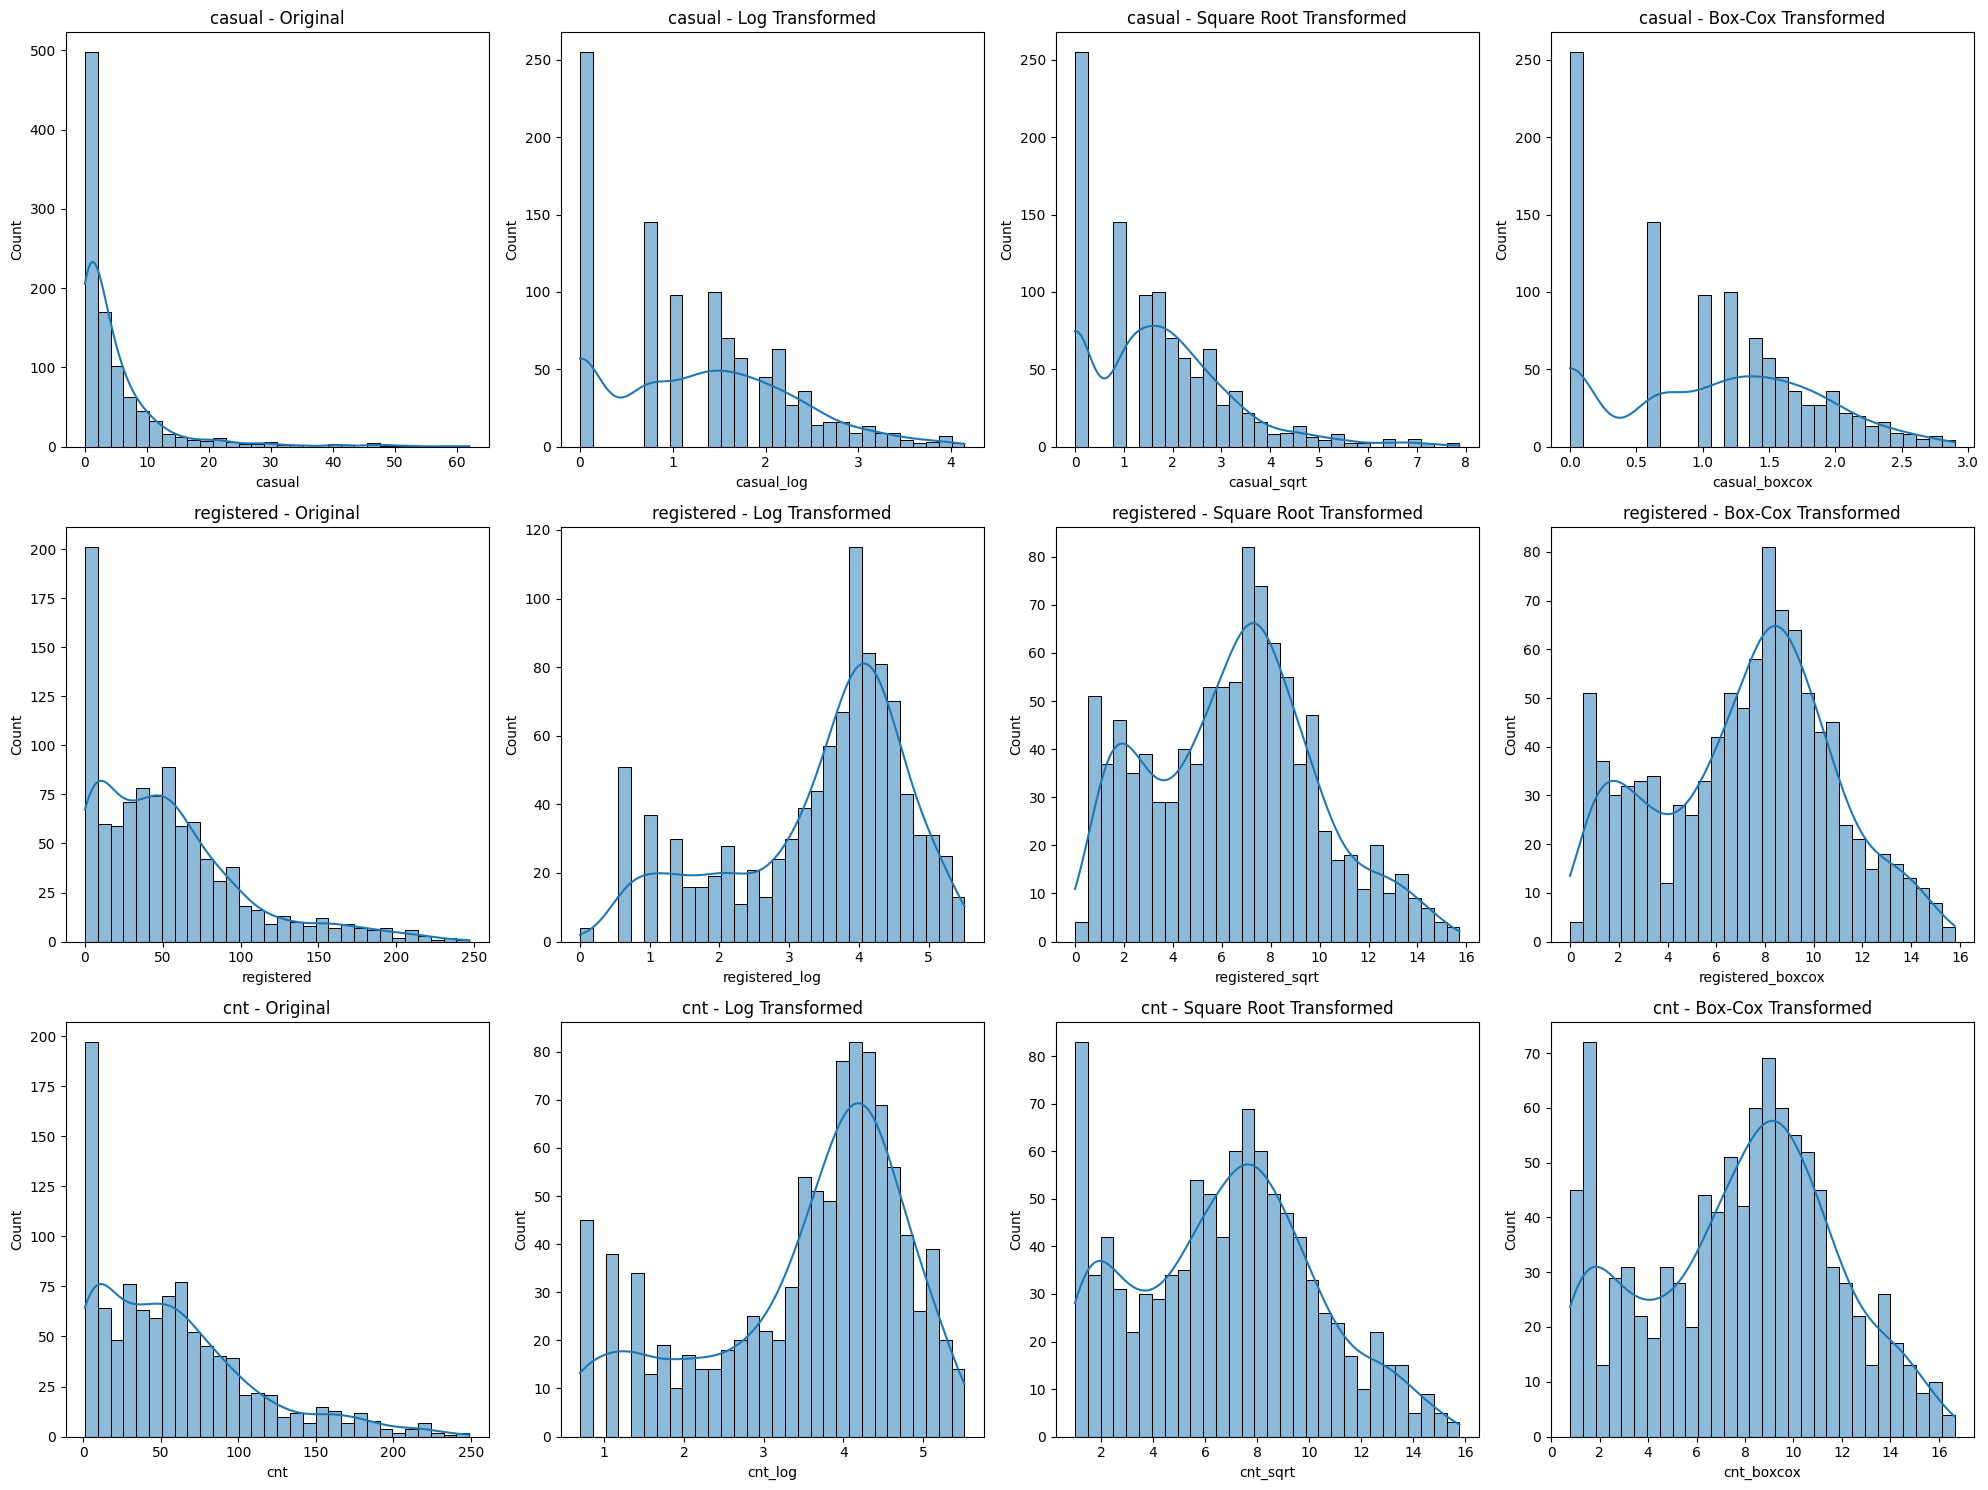

Data with Transformed Features:
    casual_log  registered_log   cnt_log  casual_sqrt  registered_sqrt  \
0    1.386294        2.639057  2.833213     1.732051         3.605551   
1    2.197225        3.496508  3.713572     2.828427         5.656854   
2    1.791759        3.332205  3.496508     2.236068         5.196152   
3    1.386294        2.397895  2.639057     1.732051         3.162278   
4    0.000000        0.693147  0.693147     0.000000         1.000000   

   cnt_sqrt  casual_boxcox  registered_boxcox  cnt_boxcox  
0  4.000000       1.223631           4.222587    4.813883  
1  6.324555       1.807381           6.605707    7.558046  
2  5.656854       1.526387           6.095017    6.801880  
3  3.605551       1.223631           3.665826    4.313226  
4  1.000000       0.000000           0.779419    0.783367  


In [75]:
#Q 7 ----------------

data = pd.read_csv('hour.csv')

data.head()



# For demonstration, we'll generate more rows by repeating the provided data
data = pd.concat([data] * 50, ignore_index=True).head(1000)

# Variables to transform
variables = ['casual', 'registered', 'cnt']

# Apply transformations
for var in variables:
    # Log transformation (adding 1 to avoid log(0))
    data[f'{var}_log'] = np.log(data[var] + 1)

    # Square root transformation
    data[f'{var}_sqrt'] = np.sqrt(data[var])

    # Box-Cox transformation (requires positive values, adding 1)
    data[f'{var}_boxcox'], _ = stats.boxcox(data[var] + 1)

# Visualize the transformations
fig, axs = plt.subplots(len(variables), 4, figsize=(20, 15))

for i, var in enumerate(variables):
    sns.histplot(data[var], bins=30, ax=axs[i, 0], kde=True)
    axs[i, 0].set_title(f'{var} - Original')

    sns.histplot(data[f'{var}_log'], bins=30, ax=axs[i, 1], kde=True)
    axs[i, 1].set_title(f'{var} - Log Transformed')

    sns.histplot(data[f'{var}_sqrt'], bins=30, ax=axs[i, 2], kde=True)
    axs[i, 2].set_title(f'{var} - Square Root Transformed')

    sns.histplot(data[f'{var}_boxcox'], bins=30, ax=axs[i, 3], kde=True)
    axs[i, 3].set_title(f'{var} - Box-Cox Transformed')

plt.tight_layout()
plt.show()

# Display the transformed data
print("Data with Transformed Features:\n", data[[f'{var}_log' for var in variables] + [f'{var}_sqrt' for var in variables] + [f'{var}_boxcox' for var in variables]].head())


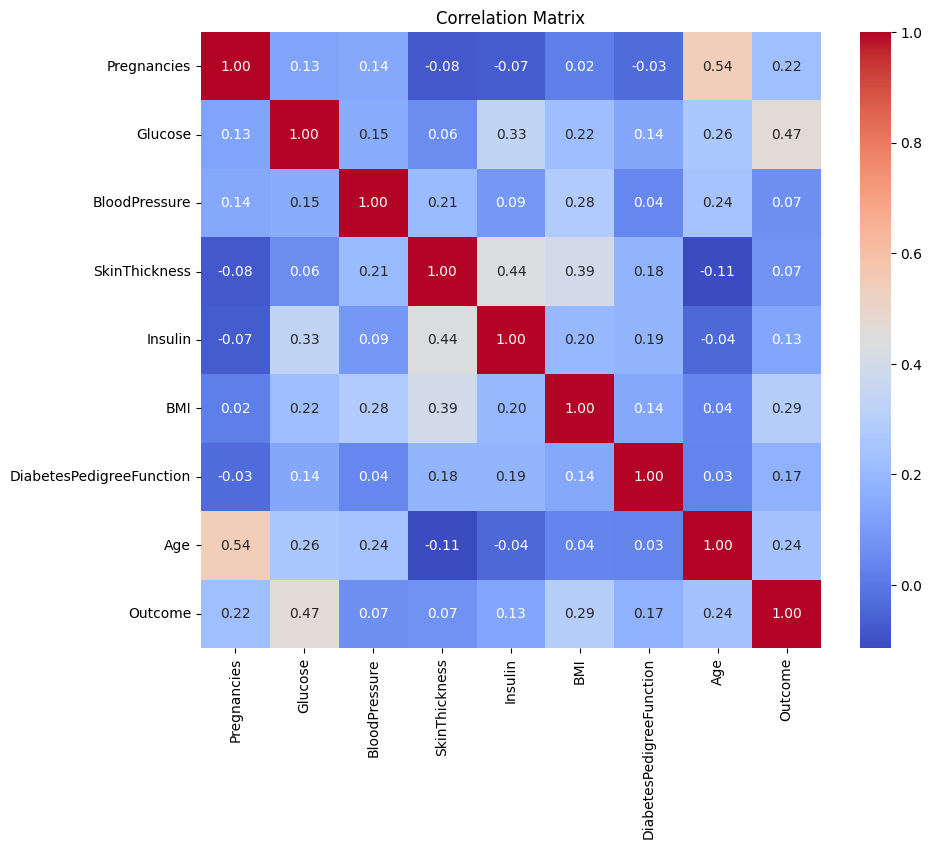

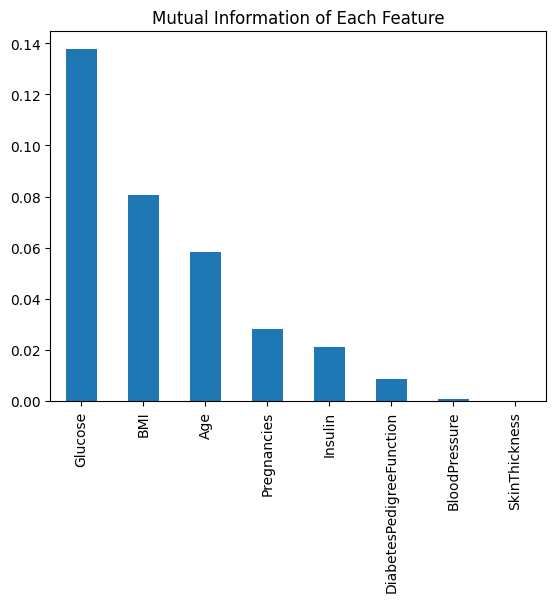

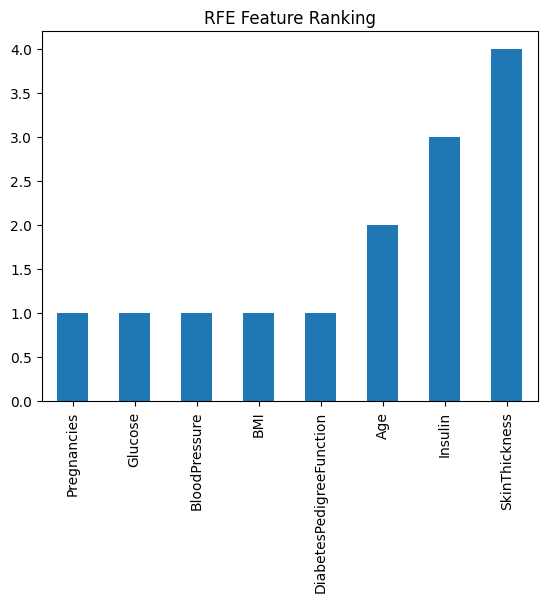

Correlation Matrix:
                           Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose             

In [78]:
# Q  8
from sklearn.feature_selection import mutual_info_classif, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('diabetes.csv')

# Standardize the features for RFE
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.drop(columns='Outcome'))
y = data['Outcome']

# Correlation analysis
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Mutual Information
mi = mutual_info_classif(X_scaled, y)
mi_series = pd.Series(mi, index=data.columns[:-1])
mi_series.sort_values(ascending=False).plot.bar()
plt.title('Mutual Information of Each Feature')
plt.show()


model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X_scaled, y)
rfe_ranking = pd.Series(rfe.ranking_, index=data.columns[:-1])
rfe_ranking.sort_values().plot.bar()
plt.title('RFE Feature Ranking')
plt.show()


print("Correlation Matrix:\n", correlation_matrix)
print("\nMutual Information Scores:\n", mi_series.sort_values(ascending=False))
print("\nRFE Ranking:\n", rfe_ranking.sort_values())
